# Import and Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import joblib

# Data Load

In [2]:
# Load dataset
personality_df = pd.read_csv(r"C:\Users\THINKPAD\Documents\Datasets\social behavior & personality types\personality_datasert.csv")

# Exploration and Cleaning

In [3]:
# dataset shape
personality_df.shape

(2900, 8)

In [4]:
# preview of the dataset
personality_df.head(4)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert


In [5]:
# information about the dataset
personality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [6]:
# check for null values
print(personality_df.isnull().sum())

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


In [7]:
# check for duplicates
print(personality_df.duplicated().sum())

402


In [8]:
# Drop duplicates
personality_df = personality_df.drop_duplicates(keep = 'first')

In [10]:
# Separate categorical and numerical columns
cat_col = [col for col in personality_df.columns if personality_df[col].dtypes == object]
num_col = [col for col in personality_df.columns if personality_df[col].dtypes != object]

In [12]:
# Summary statistics
personality_df[num_col].describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000
mean,4.232128,4.200867,3.192954,6.580130,3.815283
std,3.406630,2.874305,2.218807,4.257516,2.914253
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,3.000000,1.000000
50%,3.000000,4.000000,3.000000,6.000000,3.000000
75%,7.000000,7.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [13]:
personality_df[cat_col].apply(lambda x: x.unique()).T

,0,1
Stage_fear,No,Yes
Drained_after_socializing,No,Yes
Personality,Extrovert,Introvert


# Exploratory Data Analysis & Visualizations

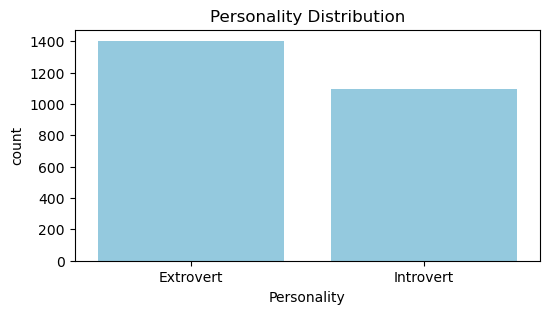

In [14]:
# Class Distribution
plt.figure(figsize = (6, 3))
sns.countplot(data=personality_df, x='Personality', color='skyblue')
plt.title('Personality Distribution')
plt.show()

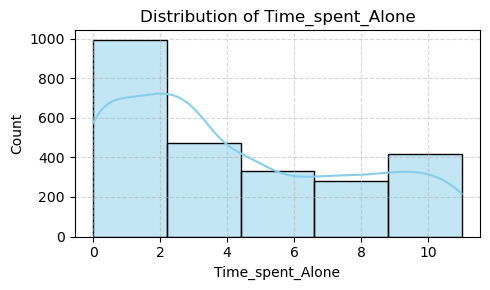

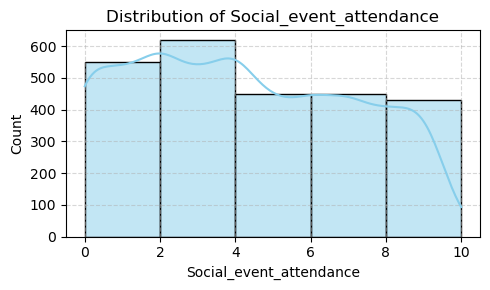

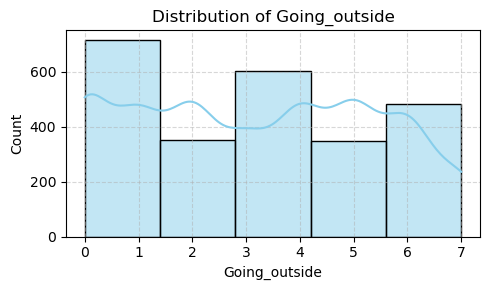

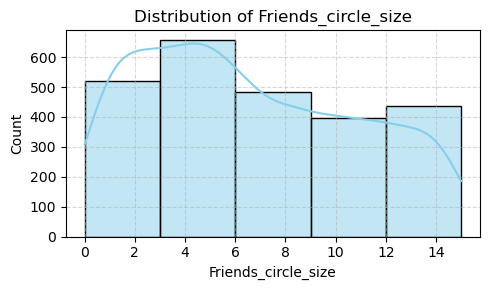

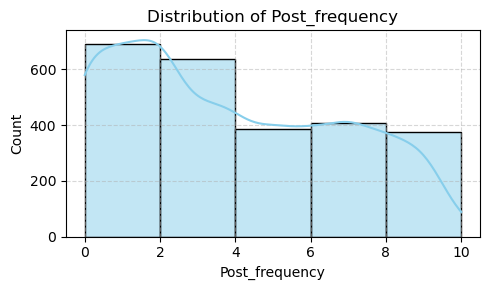

In [15]:
for col in personality_df[num_col].columns:
    plt.figure(figsize=(5,3))
    sns.histplot(data=personality_df, x=col, kde=True, bins=5, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

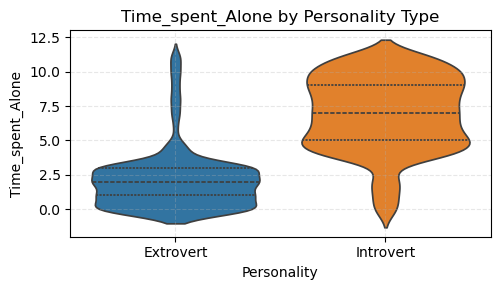

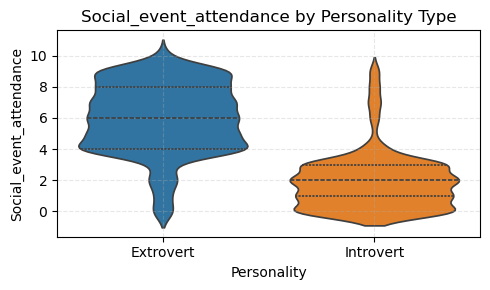

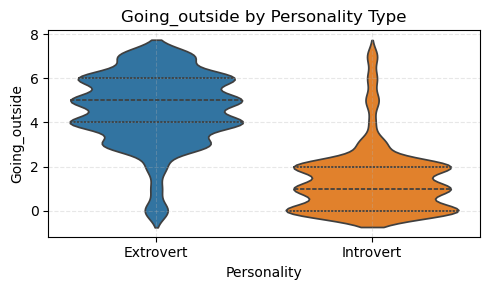

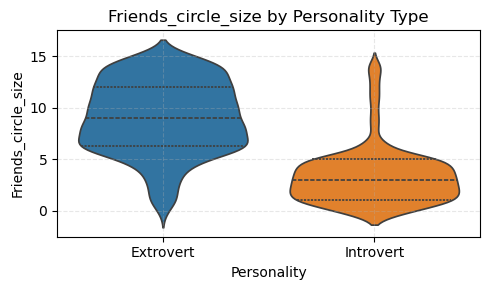

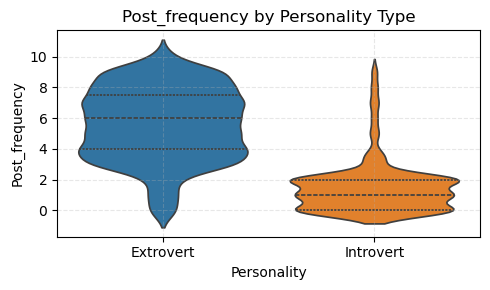

In [28]:
for feature in personality_df[num_col].columns:
    plt.figure(figsize=(5, 3))
    sns.violinplot(data = personality_df, x = 'Personality', y = feature, inner='quartile', hue = 'Personality')
    plt.title(f'{feature} by Personality Type')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.savefig('feature by personality type.png')
    plt.show()

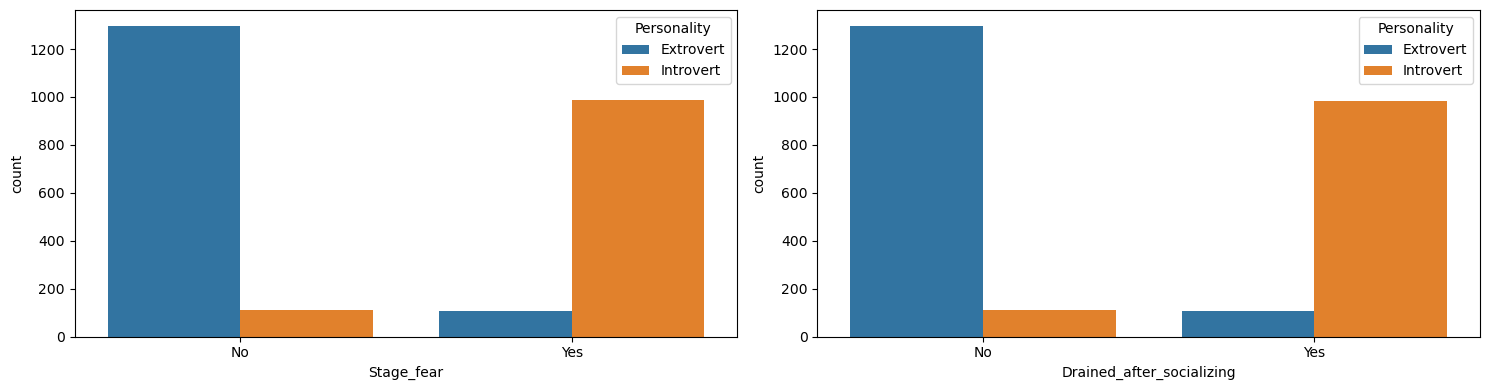

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))
sns.countplot(data=personality_df, x='Stage_fear', hue='Personality', ax=ax[0])
sns.countplot(data=personality_df, x='Drained_after_socializing', hue='Personality', ax=ax[1])
plt.tight_layout()
plt.show()

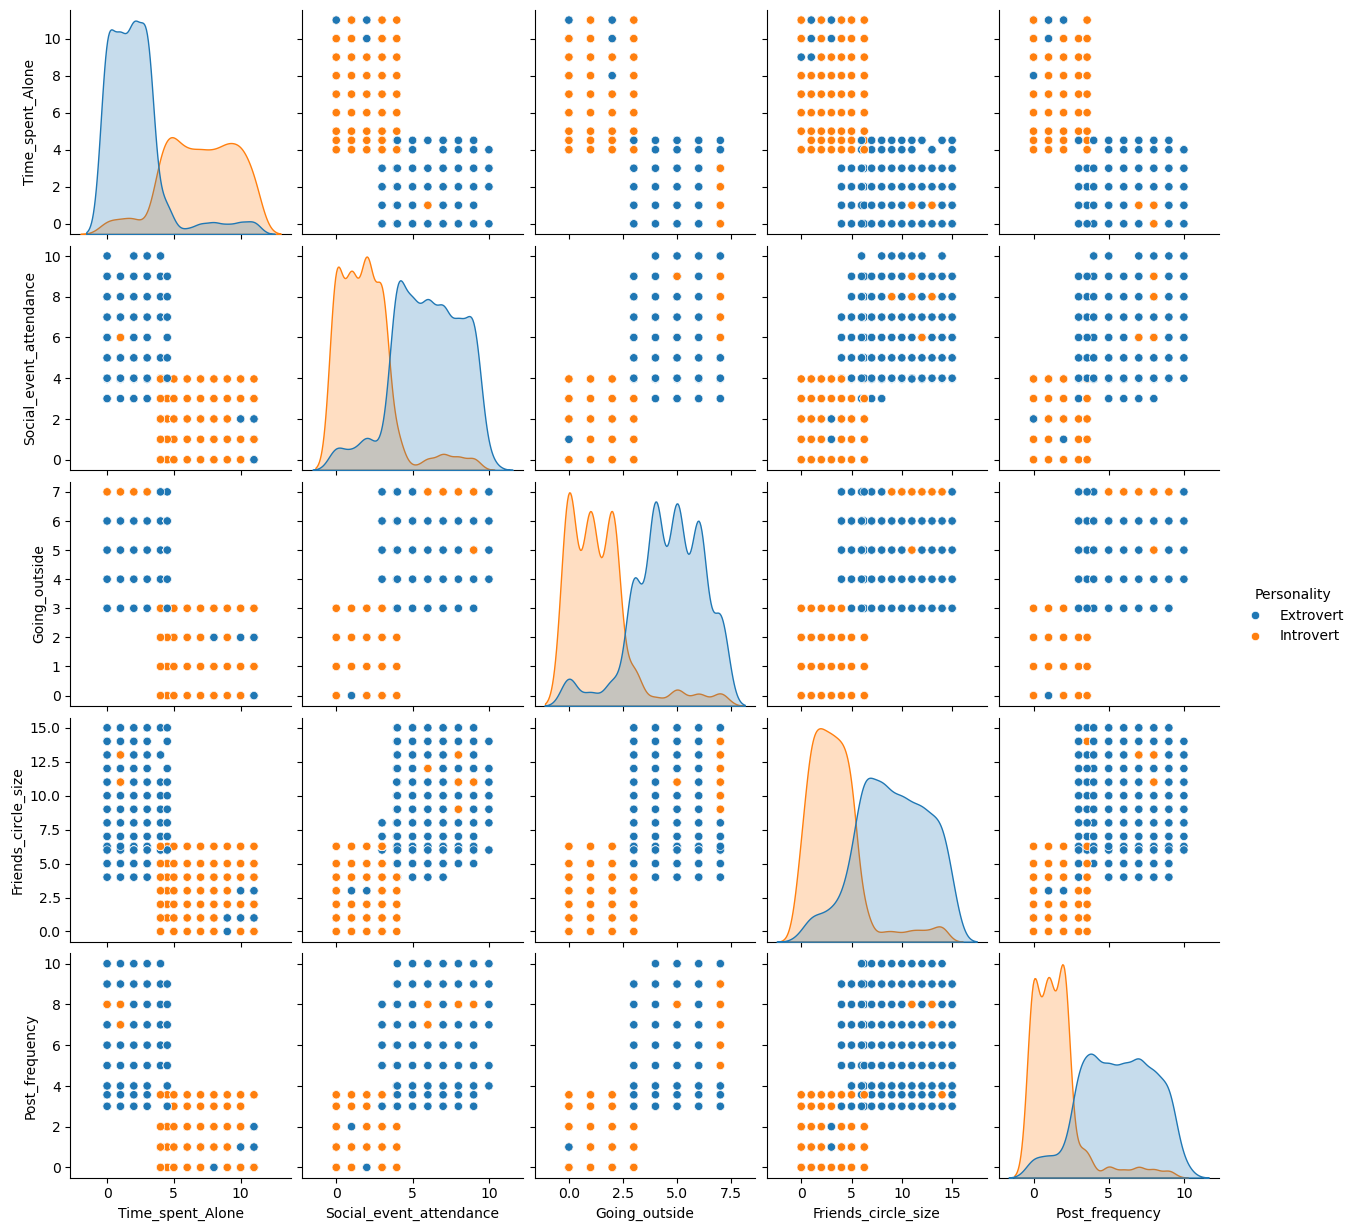

In [17]:
sns.pairplot(data=personality_df.drop(['Stage_fear', 'Drained_after_socializing'], axis=1), hue='Personality')
plt.show()

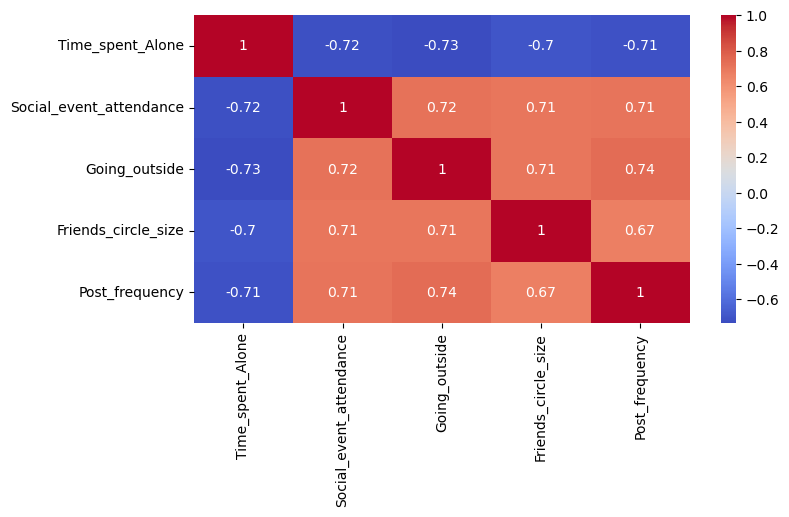

In [20]:
plt.figure(figsize = (8,4))
sns.heatmap(personality_df[num_col].corr(), annot=True,cmap='coolwarm',)
plt.show()

## Insights From EDA

From the EDA we can deduce the following;
- extroverts slighly outnumber introverts - approximately 1400 to 1200.
- extroverts consistently show higher and more varied engagement across both digital and real-world social behaviors, while introverts demonstrate lower, more concentrated patterns — clearly distinguishing the two personality types through measurable activity.
- extroverts overwhelmingly report that they do not feel drained after social engagements and show no stage fear unlike most introverts

# Data Preprocessing

In [30]:
# One-hot encode binary features
encoded_cat = pd.get_dummies(personality_df[cat_col].drop('Personality', axis=1), drop_first=True, dtype='int')

# Concatenate encoded features
df_final = pd.concat([personality_df, encoded_cat], axis=1)

In [31]:
df_final.head(4)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Stage_fear_Yes,Drained_after_socializing_Yes
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert,0,0
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert,1,1
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert,1,1
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert,0,0


In [39]:
# Feature matrix and target
X = df_final.drop(['Personality', 'Stage_fear', 'Drained_after_socializing'], axis=1)
y = df_final['Personality']

In [40]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Data Scaling, Data Modeling with Pipeline

In [41]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=101),
    'Gradient Boosting': GradientBoostingClassifier()
}

pipelines = {
    name: Pipeline([
        ('scaler', StandardScaler()),       # Applies to all features
        ('model', clf)
    ])
    for name, clf in models.items()
}

# Model Training & Evaluation


 Training: Logistic Regression
Accuracy: 0.9160

Classification Report:
               precision    recall  f1-score   support

   Extrovert       0.91      0.94      0.92       269
   Introvert       0.92      0.89      0.91       231

    accuracy                           0.92       500
   macro avg       0.92      0.91      0.92       500
weighted avg       0.92      0.92      0.92       500



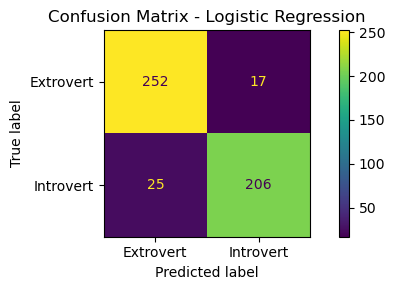


 Training: Random Forest
Accuracy: 0.9100

Classification Report:
               precision    recall  f1-score   support

   Extrovert       0.91      0.93      0.92       269
   Introvert       0.91      0.89      0.90       231

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



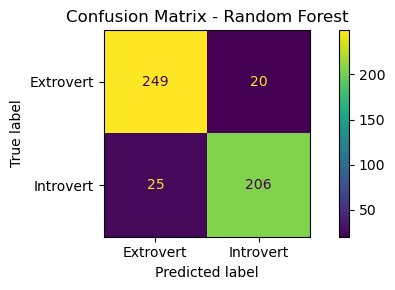


 Training: Gradient Boosting
Accuracy: 0.9440

Classification Report:
               precision    recall  f1-score   support

   Extrovert       0.96      0.93      0.95       269
   Introvert       0.92      0.96      0.94       231

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



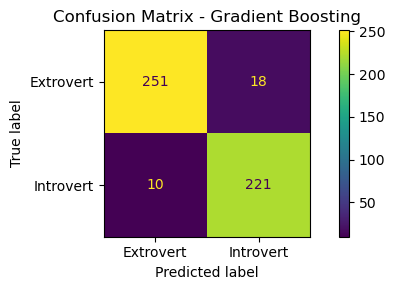

In [42]:
results = {}

for name, pipeline in pipelines.items():
    print(f"\n Training: {name}")
    
    # data fitting to model
    pipeline.fit(X_train, y_train)

    # predictions
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Accuracy: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Extrovert', 'Introvert']))

    fig, ax = plt.subplots(figsize=(6, 3))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
    plt.title(f'Confusion Matrix - {name}')
    plt.tight_layout()
    plt.show()

In [43]:
results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
results_df

,Model,Accuracy
2,Gradient Boosting,0.944
0,Logistic Regression,0.916
1,Random Forest,0.910


# Cross-Validation

In [44]:
print("\nCross-Validation (5-fold):")

for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    print(f"{name}: Mean CV Accuracy = {scores.mean():.3f} | Std = {scores.std():.3f}")


Cross-Validation (5-fold):
Logistic Regression: Mean CV Accuracy = 0.913 | Std = 0.031
Random Forest: Mean CV Accuracy = 0.898 | Std = 0.013
Gradient Boosting: Mean CV Accuracy = 0.922 | Std = 0.021


# Learning Curve for the Best Performing Model (Gradient Boosting)

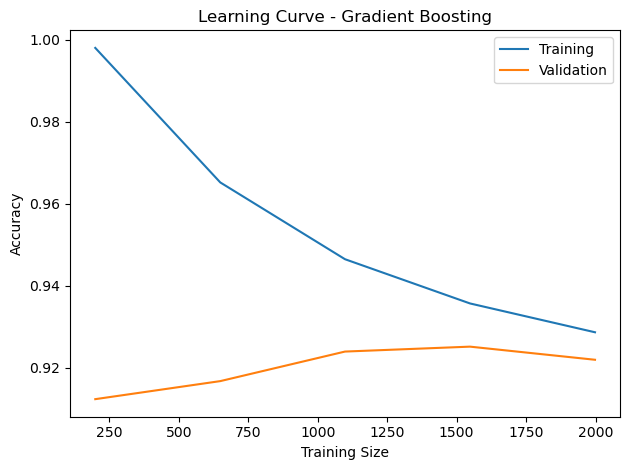

In [45]:
best_pipeline = pipelines['Gradient Boosting']

train_sizes, train_scores, val_scores = learning_curve(best_pipeline, X, y, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation')
plt.title('Learning Curve - Gradient Boosting')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Feature Importance (Gradient Boosting Only)

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_10476\3015403443.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_imp_df, x='Importance', y='Feature', palette='viridis')


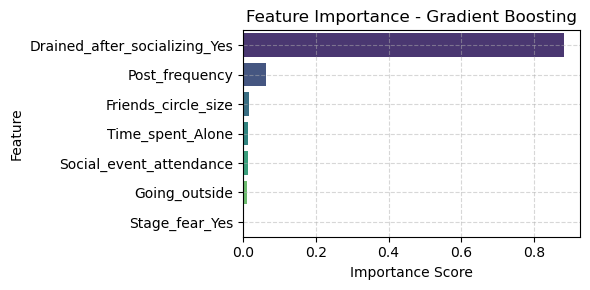

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract importances
feature_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Barplot
plt.figure(figsize=(6, 3))
sns.barplot(data=feature_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Best Model

In [50]:
joblib.dump(best_pipeline, 'gradient_boosting_pipeline.pkl')
print("Saved: gradient_boosting_pipeline.pkl")

Saved: gradient_boosting_pipeline.pkl
